# Impulse Response Function

In this notebook we further investigate and exemplify the impulse response functions used in time series modelling of groundwater level. The impulse response functions discussed below are used in the GWTSA model. 

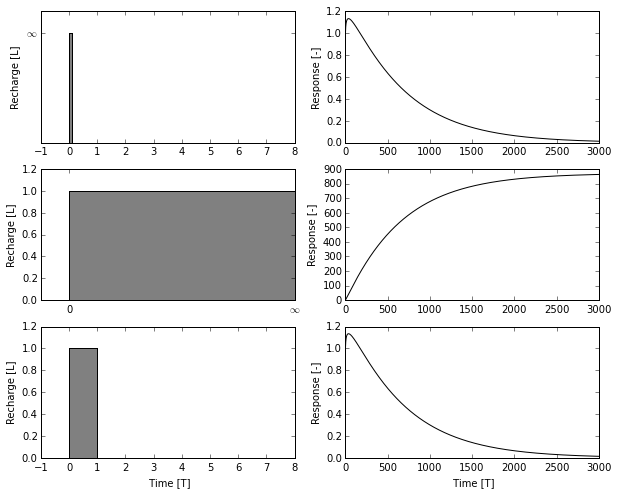

In [34]:
#Import packages for basic calculations and plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma
%matplotlib inline

# Import packages for interactive plotting for increased understanding
from IPython.html.widgets import interact;
import IPython.html.widgets as widgets;

# First start with the input parameters

t = np.arange(0,3000,1)
A = 1
a = 0.01
n = 1.5
b = 0

# Create the impulse response curve
X1 = A * ((a ** n) * (t ** (n-1)) * np.exp(-a*t)) / gamma(n)

A = A
a = 1/a
n = 1.35
b = 0.0

# Create the step response curve
Fs = A * gammainc(n,t/a)

# Test of response function of Peterson et al. (2014)
A = 10**-0.014
a = 10**2.8
n = 1.06
X1 = A*t**(n-1)*np.exp(-t/a)
Fs = np.cumsum(A*t**(n-1)*np.exp(-t/a))

# Create the block response curve
Fb = Fs[1:] - Fs[0:-1]
Fb = np.append(0, Fb) #This is only done for drawing the graph as you normally
# Convolute 

plt.figure(figsize=(10,8))

plt.subplot(321)
plt.bar([0],[1],width=0.1, color='gray')
plt.xlim(-1,8)
plt.ylim(0,1.2)
plt.yticks([1],['$\infty$'])
plt.ylabel('Recharge [L]')
plt.subplot(322)
plt.plot(t,X1, 'k')

plt.ylabel('Response [-]')
plt.xlim(0,3000)


plt.subplot(323)
plt.bar([0],[1],width=8, color='gray')
plt.ylim(0,1.2)
plt.xlim(-1,8)
plt.xticks([0, 8],[0, '$\infty$'])
plt.ylabel('Recharge [L]')
plt.subplot(324)
plt.plot(np.arange(len(Fs)),Fs, 'k')
plt.ylabel('Response [-]')
plt.xlim(0,3000)


plt.subplot(325)
plt.bar([0],[1],width=1, color='gray')
plt.ylim(0,1.2)
plt.xlim(-1,8)
plt.ylabel('Recharge [L]')
plt.xlabel(' Time [T]')
plt.subplot(326)
plt.plot(np.arange(len(Fb)),Fb, 'k')
plt.ylabel('Response [-]')
plt.xlim(0,3000)
plt.xlabel(' Time [T]')

### Interactive example plot

We have now seen a static plot of the impulse, step and block response functions. In the following example an interactive plot is presented. The use can use the sliders to adapt the values of the block response function.

<function __main__.impulseresponse_plot>

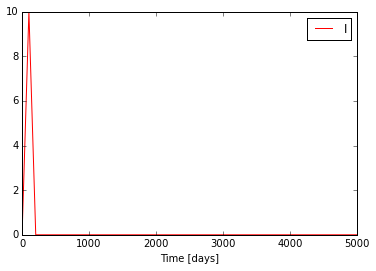

In [10]:
# Define a function that calculates and plots the impulse response function
def impulseresponse_plot(A,a,n):
    t = np.linspace(0,5000)
    Fs = A * gammainc(n,t/a) #Step Response Function
    Fb = Fs[1:] - Fs[0:-1] # Block Response Function
    Fb = np.append(0,Fb) #This is done for the visualisation, not for actual modelling!!
    plt.plot(t,Fb,'r')
    plt.xlabel('Time [days]')
    plt.ylabel('')
    plt.legend('IRF', loc = 1)
    return Fb

interact(impulseresponse_plot, 
        A = widgets.FloatSliderWidget(min = 0.01, max = 400, step =1, description = 'A', value = 10),
        a = widgets.FloatSliderWidget(min = 1, max = 1000, step =0.005, value = 0.01),
        n = widgets.FloatSliderWidget(min = 0.01, max = 10, step =0.10, value = 1.5))